# Flight Results Comparison

In [1]:
import matplotlib.pyplot as plt
plt.style.use(['science', 'grid'])

In [2]:
import numpy as np
import pandas as pd
%matplotlib inline

## OpenRocket

In [3]:
df_or = pd.read_csv('../Valetudo_openrocket/Valetudo_OpenRocket_27out.csv', delimiter=';')

In [4]:
df_or = df_or[~df_or['# Time (s)'].str.contains("#")]

In [5]:
time_or = df_or['# Time (s)'].iloc[248:]
altitude_or = df_or['Altitude (m)'].iloc[248:]
velocity_or = df_or['Vertical velocity (m/s)'].iloc[248:]
total_velocity_or = df_or['Total velocity (m/s)'].iloc[248:]
acceleration_or = df_or['Vertical acceleration (m/s)'].iloc[248:]
# roll_rate_or = df_or['Roll rate (°/s)'].iloc[248:]
# yaw_rate_or = df_or['Yaw rate (°/s)'].iloc[248:]
# pitch_rate_or = df_or['Pitch rate (°/s)'].iloc[248:]
# wind_velocity_or = df_or['Wind velocity (m/s)'].iloc[248:]
angle_attack_or = df_or['Angle of attack ()'].iloc[248:]
easting_or = df_or['Position East of launch (m)'].iloc[248:]
northing_or = df_or['Position North of launch (m)'].iloc[248:]

In [6]:
L = []
for i in time_or:
  L.append(float(i)) #- 0.494
time_or = L

L = []
for i in altitude_or:
  L.append(float(i))
altitude_or = L

L = []
for i in velocity_or:
  L.append(float(i))
velocity_or = L

L = []
for i in total_velocity_or:
  L.append(float(i))
total_velocity_or = L

L = []
for i in acceleration_or:
  L.append(float(i))
acceleration_or = L

L = []
for i in angle_attack_or:
  L.append(float(i))
angle_attack_or = L

L = []
for i in easting_or:
  L.append(float(i))
easting_or = L


L = []
for i in northing_or:
  L.append(float(i))
northing_or = L

## Cambridge

In [7]:
df_cb = pd.read_csv('../Valetudo_cambridge/valetudo_3000simulations.csv', delimiter=',')

In [8]:
time_cb = df_cb['TIME_SECONDS_DOUBLE'].iloc[:207]
altitude_cb = df_cb['ALTITUDE_METERS_DOUBLE'].iloc[:207]
easting_cb = df_cb['EASTINGS_METERS_DOUBLE'].iloc[:207]
northing_cb = df_cb['NORTHINGS_METERS_DOUBLE'].iloc[:207]

In [9]:
velocity_cb = [0]
for i in range(1, len(time_cb)-1):
    velocity_cb.append((altitude_cb[i+1] - altitude_cb[i-1])/(time_cb[i+1] - time_cb[i-1]))
velocity_cb.append(velocity_cb[-1])

## RocketPy

In [10]:
df_rp = pd.read_csv('../Valetudo_RocketPy/valetudo_ROCKETPY_CFD.csv', delimiter=',')

In [11]:
time_rp = df_rp['t(s)']
altitude_rp = df_rp['z(m)']
velocity_rp = df_rp['vz(m/s)']
total_velocity_rp = np.sqrt((df_rp['vx(m/s)']**2) + (df_rp['vy(m/s)']**2) + (df_rp['vz(m/s)']**2))
angle_attack_rp = df_rp['Angle_of_Attack(degrees)']
acceleration_rp = df_rp['az(m/s²)']
easting_rp = df_rp['x(m)']
northing_rp = df_rp['y(m)']

## Comparisons

In [13]:
from rocketpy import Function, Environment

ENV = Environment(railLength=5.7,     
                  gravity = 9.8,
                  date=(2019, 8, 10, 21),    
                  latitude = -23.363611, 
                  longitude = -48.011389,
                  elevation=668)

ENV.setAtmosphericModel(type='Ensemble',
                        file='../Valetudo_RocketPy/LASC2019_Reanalysis.nc',
                        dictionary="ECMWF")

ENV.maxExpectedHeight = 1000+668

# Create height grid
grid = np.linspace(ENV.elevation, ENV.maxExpectedHeight)

### Cambridge - RocketPy - OpenRocket
- Altitude
- Vertical Velocity

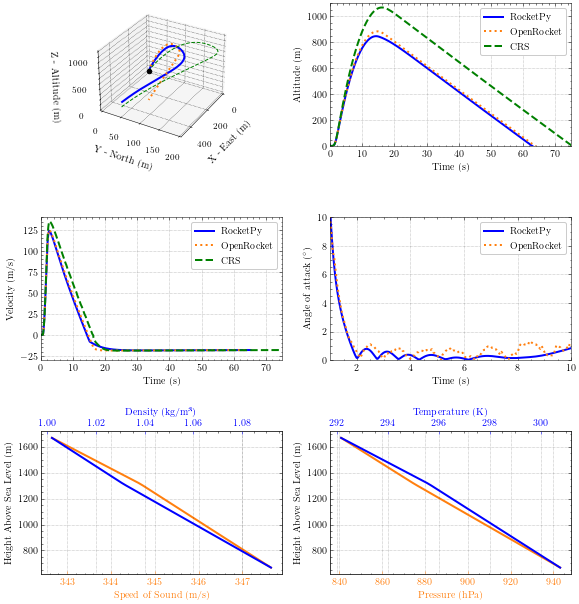

In [14]:
plt.style.use(['science', 'grid'])

fig = plt.figure(figsize=(9.5,10.5))
ax1 = fig.add_subplot(3,2,1,projection='3d')
ax2 = fig.add_subplot(3,2,2)
ax3 = fig.add_subplot(3,2,3)
ax4 = fig.add_subplot(3,2,4)
ax5 = fig.add_subplot(3,2,5)
ax6 = fig.add_subplot(3,2,6)

ax1.plot(easting_rp, northing_rp, altitude_rp, c='b', linewidth='2', label='RocketPy')
ax1.plot(easting_or, northing_or, altitude_or, 'r:', color='#ff7f0e', linewidth='2', label='OpenRocket')
ax1.plot(easting_cb, northing_cb, altitude_cb, 'g--', linewidth='1', label='CRS')
ax1.scatter(0, 0, 0, c='k')
ax1.set_xlabel("X - East (m)", fontsize=10)
ax1.set_ylabel("Y - North (m)", fontsize=10)
ax1.set_zlabel("Z - Altitude (m)", fontsize=10)
ax1.set_zlim3d([0, 1100])
ax1.set_ylim3d([0, 200])
ax1.set_xlim3d([0, 500])
ax1.view_init(30, 30)
ax1.set_zticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100], minor=True)
plt.setp(ax1.get_xticklabels(), fontsize=9)
plt.setp(ax1.get_yticklabels(), fontsize=9)
plt.setp(ax1.get_zticklabels(), fontsize=9)
ax1.minorticks_off()
# ax1.legend(loc='upper right', bbox_to_anchor=(0.25, 0.95), fontsize=12)

ax2.plot(time_rp, altitude_rp, c='b', label='RocketPy', linewidth=2)
ax2.plot(time_or, altitude_or, 'r:', color='#ff7f0e', label='OpenRocket', linewidth=2)
ax2.plot(time_cb, altitude_cb, 'g--', label='CRS', linewidth=2)
ax2.set_xlabel('Time (s)', fontsize=10)
ax2.set_ylabel('Altitude (m)', fontsize=10)
# ax1.set_xticks(np.arange(0, 76, 5), rotation=60, fontsize=9)
# ax1.set_yticks(np.arange(0, 1101, 100), rotation=0, fontsize=9)
ax2.set_xlim(0, 75)
ax2.set_ylim(0, 1100)
ax2.legend(fontsize=9.5) #loc='upper right'

ax3.plot(time_rp, velocity_rp, c='b', label='RocketPy', linewidth=2)
ax3.plot(time_or, velocity_or, 'r:', color='#ff7f0e', label='OpenRocket', linewidth=2)
ax3.plot(time_cb, velocity_cb, 'g--', label='CRS', linewidth=2)
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('Velocity (m/s)')
# ax2.set_xticks(np.arange(0, 76, 5), rotation=60, fontsize=9)
# ax2.set_yticks(np.arange(-25, 140, 25), rotation=0, fontsize=9)
ax3.set_xlim(0, 75)
ax3.set_ylim(-30, 140)
ax3.legend(fontsize=9.5) #loc='upper right'

ax4.plot(time_rp, angle_attack_rp, c='b', label='RocketPy', linewidth=2)
ax4.plot(time_or, angle_attack_or, 'g:',color='#ff7f0e',label='OpenRocket', linewidth=2)
ax4.set_xlabel('Time (s)')
ax4.set_ylabel(r'Angle of attack ($^{\circ}$)')
# ax4.set_xticks(np.arange(1, 11, 1), fontsize=9)
# ax4.set_yticks(np.arange(0, 12, 2), fontsize=9)
ax4.set_xlim(1, 10)
ax4.set_ylim(0, 10)
ax4.legend(fontsize=9.5) #loc='upper right'

ax5.plot(
    [ENV.speedOfSound(i) for i in grid],
    grid,
    color='#ff7f0e',
    label="Speed of Sound",
    linewidth=2
)
ax5.set_xlabel("Speed of Sound (m/s)", color='#ff7f0e')
ax5.tick_params("x", colors='#ff7f0e')
ax5up = ax5.twiny()
ax5up.plot(
    [ENV.density(i) for i in grid], grid, color='blue', label="Density", linewidth=2
)
ax5up.set_xlabel("Density (kg/m³)", color='blue')
ax5up.tick_params("x", colors='blue')
ax5.set_ylabel("Height Above Sea Level (m)")
ax5.grid(True)

ax6.plot(
    [ENV.pressure(i) / 100 for i in grid], grid, '#ff7f0e', label="Pressure", linewidth=2
)
ax6.set_xlabel("Pressure (hPa)", color='#ff7f0e')
ax6.tick_params("x", colors='#ff7f0e')
ax6up = ax6.twiny()
ax6up.plot(
    [ENV.temperature(i) for i in grid],
    grid,
    color='blue',
    label="Temperature",
    linewidth=2
)
ax6up.set_xlabel("Temperature (K)", color='blue')
ax6up.tick_params("x", colors='blue')
ax6.set_ylabel("Height Above Sea Level (m)")

plt.subplots_adjust(hspace=0.5)
# plt.savefig('Graphs_2021_05_14/all.pdf')
plt.show()

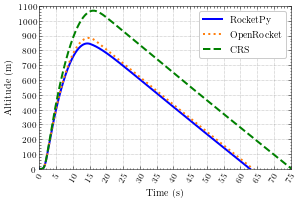

In [20]:
plt.figure(figsize=(4.5, 3))

cm = plt.cm.get_cmap('tab20c')

plt.plot(time_rp, altitude_rp, c='b', label='RocketPy', linewidth=2)
plt.plot(time_or, altitude_or, 'r:', color='#ff7f0e', label='OpenRocket', linewidth=2)
plt.plot(time_cb, altitude_cb, 'g--', label='CRS', linewidth=2)
plt.xlabel('Time (s)', fontsize=10)
plt.ylabel('Altitude (m)', fontsize=10)

plt.xticks(np.arange(0, 76, 5), rotation=60, fontsize=9)
plt.yticks(np.arange(0, 1101, 100), rotation=0, fontsize=9)
plt.xlim(0, 75)
plt.ylim(0, 1100)

plt.legend(fontsize=9.5) #loc='upper right'

plt.savefig('Graphs_2021_05_14/altitude_grid_cb_op_rp.pdf')
plt.show()

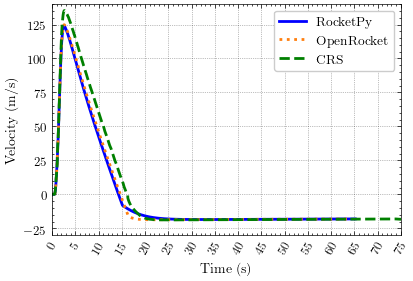

In [110]:
plt.figure(figsize=(4.5, 3))

plt.plot(time_rp, velocity_rp, c='b', label='RocketPy', linewidth=2)
plt.plot(time_or, velocity_or, 'r:', color='#ff7f0e', label='OpenRocket', linewidth=2)
plt.plot(time_cb, velocity_cb, 'g--', label='CRS', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.xticks(np.arange(0, 76, 5), rotation=60, fontsize=9)
plt.yticks(np.arange(-25, 140, 25), rotation=0, fontsize=9)
plt.xlim(0, 75)
plt.ylim(-30, 140)

plt.legend(fontsize=9.5) #loc='upper right'

plt.savefig('Graphs_2021_05_14/verticalVel_grid_op_rp.pdf')
plt.show()

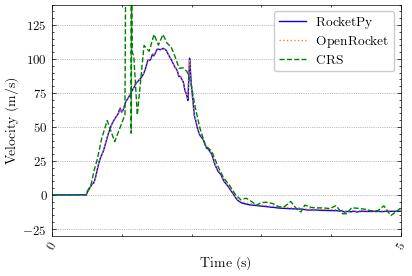

In [115]:
plt.figure(figsize=(4.5, 3))

time_cb_np = time_cb.to_numpy()
velocity_cb_np = np.array(velocity_cb)
acceleration_cb = np.diff(velocity_cb_np)/np.diff(time_cb_np)

time_rp_np = time_rp.to_numpy()
velocity_rp_np = velocity_rp.to_numpy()
acceleration_rp_np = np.diff(velocity_rp_np)/np.diff(time_rp_np)

plt.plot(time_rp[:-1], acceleration_rp_np, c='b', label='RocketPy', linewidth=1)
plt.plot(time_or, acceleration_or, 'r:', color='#ff7f0e', label='OpenRocket', linewidth=1)
plt.plot(time_cb[:-1], acceleration_cb, 'g--', label='CRS', linewidth=1)
plt.xlabel('Time (s)')
plt.ylabel('Velocity (m/s)')
plt.xticks(np.arange(0, 76, 5), rotation=60, fontsize=9)
plt.yticks(np.arange(-25, 140, 25), rotation=0, fontsize=9)
plt.xlim(0, 5)
plt.ylim(-30, 140)

plt.legend(fontsize=9.5) #loc='upper right'

# plt.savefig('Graphs_2021_05_14/verticalAcc_grid_op_rp.pdf')
plt.show()

### RocketPy vs OpenRocket

- Velocity
- Acceleration
- Angle of attack

In [81]:
# plt.plot(time_rp, total_velocity_rp, label='RocketPy', linewidth=2)
# plt.plot(time_or, total_velocity_or, 'r--', label='OpenRocket', linewidth=2)
# plt.plot(time_cb, totalVelocity_cb,  'g--', label='CRS', linewidth=2)
# plt.title('Total Velocity x Time', fontsize=18)
# plt.xlabel('Time (s)', fontsize=12)
# plt.ylabel('Velocity (m/s)', fontsize=12)
# plt.legend()
# plt.xticks(np.arange(0, 77, 5), rotation=60)
# plt.xlim(0, 77)
# plt.ylim(0, 140)

# plt.grid()
# plt.legend(fontsize=12)

#plt.savefig('Graficos finais v2/totalVel_grid_op_rp_cb.pdf')

#plt.show()

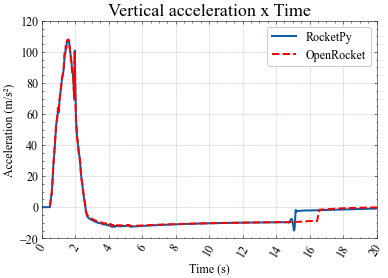

In [84]:
plt.plot(time_rp, acceleration_rp, label='RocketPy', linewidth=2)
plt.plot(time_or, acceleration_or, 'r--', label='OpenRocket', linewidth=2)
plt.title('Vertical acceleration x Time', fontsize=18)
plt.xlabel('Time (s)', fontsize=12)
plt.ylabel('Acceleration (m/s²)', fontsize=12)

plt.xticks(np.arange(0, 24, 2), rotation=60, fontsize=12)
plt.yticks(np.arange(-20, 121, 20), fontsize=12)
plt.xlim(0, 20)
plt.ylim(-20, 120)

#plt.grid()
plt.legend(fontsize=12)

plt.savefig('Graficos finais v2/verticalAcceleration_grid_op_rp.pdf')

plt.show()

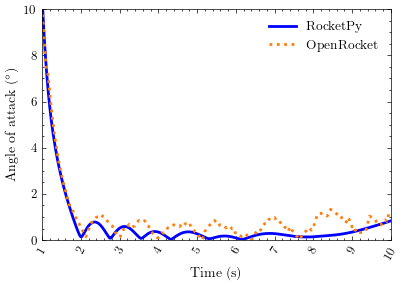

In [71]:
plt.figure(figsize=(4.5, 3))

plt.plot(time_rp, angle_attack_rp, c='b', label='RocketPy', linewidth=2)
plt.plot(time_or, angle_attack_or, 'g:',color='#ff7f0e',label='OpenRocket', linewidth=2)
plt.xlabel('Time (s)')
plt.ylabel(r'Angle of attack ($^{\circ}$)')
plt.xticks(np.arange(1, 11, 1), rotation=60, fontsize=9)
plt.yticks(np.arange(0, 12, 2), rotation=0, fontsize=9)
plt.xlim(1, 10)
plt.ylim(0, 10)

plt.legend(fontsize=9.5) #loc='upper right'

plt.savefig('Graphs_2021_05_14/AngleOfAttack_grid_op_rp.png', dpi=300)
plt.show()

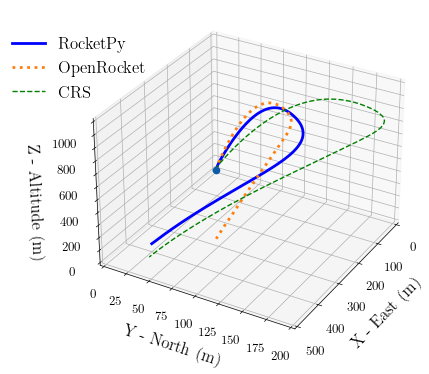

In [82]:
# Create figure
fig1 = plt.figure(figsize=(1.5*4.5, 1.5*3))

plt.style.use('science')



ax1 = plt.subplot(111, projection="3d")
ax1.plot(easting_rp, northing_rp, altitude_rp, c='b', linewidth='2', label='RocketPy')
ax1.plot(easting_or, northing_or, altitude_or, 'r:', color='#ff7f0e', linewidth='2', label='OpenRocket')
ax1.plot(easting_cb, northing_cb, altitude_cb, 'g--', linewidth='1', label='CRS')

ax1.scatter(0, 0, 0)
ax1.set_xlabel("X - East (m)", fontsize=12)
ax1.set_ylabel("Y - North (m)", fontsize=12)
ax1.set_zlabel("Z - Altitude (m)", fontsize=12)

ax1.set_zlim3d([0, 1100])
ax1.set_ylim3d([0, 200])
ax1.set_xlim3d([0, 500])
ax1.view_init(30, 30)

ax1.minorticks_off()

ax1.set_zticks([0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100], minor=True)

plt.setp(ax1.get_xticklabels(), fontsize=9)
plt.setp(ax1.get_yticklabels(), fontsize=9)
plt.setp(ax1.get_zticklabels(), fontsize=9)

plt.minorticks_off()
ax1.legend(loc='upper right', bbox_to_anchor=(0.25, 0.95), fontsize=12)

plt.savefig('Graphs_2021_05_14/Trajectory_rp_cp_op.png', dpi=300)

plt.show()

### Rocketpy Disp

In [129]:
import glob
filename = 'Valetudo_rocketpy_CFD/Valetudo_rocketpy_CFD/valetudo_reanalysis'

# Initialize variable to store all results
dispersion_general_results = []

dispersion_results = {"outOfRailTime": [],
                  "outOfRailVelocity": [],
                         "apogeeTime": [],
                     "apogeeAltitude": [],
                            "apogeeX": [],
                            "apogeeY": [],
                         "impactTime": [],
                            "impactX": [],
                            "impactY": [],
                     "impactVelocity": [],
                "initialStaticMargin": [],
              "outOfRailStaticMargin": [],
                  "finalStaticMargin": [],
                     "numberOfEvents": [],
                        "maxVelocity": [],
                  "drogueTriggerTime": [],
                 "drogueInflatedTime": [],
             "drogueInflatedVelocity": []}

# Get all dispersion results
for filename in glob.iglob(str(filename)+'.valetudo_disp_out.txt'):
    # Get file
    dispersion_output_file = open(filename, 'r+')
    
    # Read each line of the file and convert to dict
    for line in dispersion_output_file:
        if line[0] == '{':
            flight_result = eval(line)

            # Store general result
            # if flight_result['apogeeAltitude']  > 650:
            dispersion_general_results.append(flight_result)
            # Store result by type
            for parameter_key, parameter_value in flight_result.items():
                dispersion_results[parameter_key].append(parameter_value)

# Close data file
dispersion_output_file.close()

# Creating end of file
# dispersion_output_file.write ("Name Mean Value | Standard Deviation" + '\n')

# Print number of flights simulated
N = len(dispersion_general_results)
print('Number of simulations: ', N)

Number of simulations:  19300


Apogee Altitude - Mean Value: 846.224
Apogee Altitude - Standard Deviation: 42.574
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


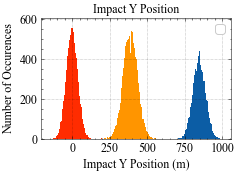

In [148]:
print('Apogee Altitude - Mean Value: {:.3f}'.format(np.mean(dispersion_results["apogeeAltitude"])))
print('Apogee Altitude - Standard Deviation: {:.3f}'.format(np.std(dispersion_results["apogeeAltitude"])))
# dispersion_output_file.write ("apogeeAltitude: " + str(np.mean(dispersion_results["apogeeAltitude"])) +' | '+str(np.std(dispersion_results["apogeeAltitude"])) + "\n")
# plt.figure(figsize=(6,4))
# plt.hist(dispersion_results["apogeeAltitude"], bins=int(N**0.5),  range=(700,1000)) #align='mid',
# plt.title('Apogee Altitude', fontsize=18)
# plt.xlabel('Altitude (m)', fontsize=12)
# plt.ylabel('Number of Occurences', fontsize=12)

#plt.savefig('Graficos finais v2/disp_apogee_rp.pdf')

#plt.show()

# Real measured apogee = 860 m

#fig, (ax1, ax4) =

fig = plt.figure(222) #plt.subplot(221)#plt.subplots(ncols=2, nrows=2, figsize=(10, 4)))

#fig.suptitle("Comparison: Flight vs Simulation", fontsize=24)
ax1 = fig.add_subplot()
ax1.hist(dispersion_results["apogeeAltitude"], bins=int(N**0.5),  range=(700,1000))
ax1.set_title('Apogee Altitude', fontsize=18)
ax1.set_xlabel('Altitude (m)', fontsize=12)
ax1.set_ylabel('Number of Occurences', fontsize=12)

ax2 = fig.add_subplot()
ax2.hist(dispersion_results["apogeeTime"], bins=int(N**0.5))
ax2.set_title('Apogee Time')
ax2.set_xlabel('Time (s)')
ax2.set_ylabel('Number of Occurences', fontsize=12)

ax3 = fig.add_subplot()
ax3.hist(dispersion_results["impactX"], bins=int(N**0.5))
ax3.set_title('Impact X Position')
ax3.set_xlabel('Impact X Position (m)')
ax3.set_ylabel('Number of Occurences', fontsize=12)

ax4 = fig.add_subplot()
ax4.hist(dispersion_results["impactY"], bins=int(N**0.5))
ax4.set_title('Impact Y Position')
ax4.set_xlabel('Impact Y Position (m)')
ax4.set_ylabel('Number of Occurences', fontsize=12)

plt.setp(ax1.get_xticklabels(), fontsize=12)
plt.setp(ax2.get_xticklabels(), fontsize=12)
plt.setp(ax1.get_yticklabels(), fontsize=12)
plt.setp(ax2.get_yticklabels(), fontsize=12)
ax1.legend(fontsize=12)
ax2.legend(fontsize=12)
ax3.legend(fontsize=12)
ax4.legend(fontsize=12)

plt.tight_layout()

plt.show()


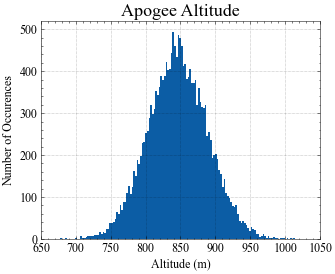

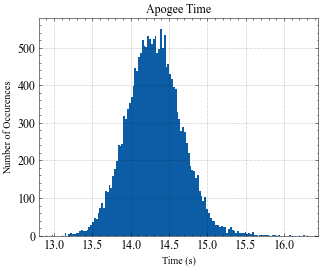

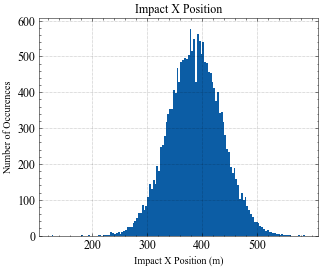

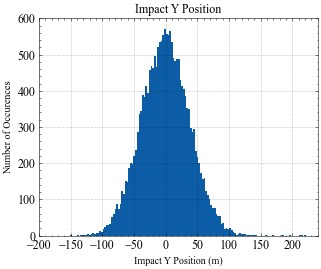

In [167]:
plt.figure(figsize=(5, 4))
plt.hist(dispersion_results["apogeeAltitude"], bins=int(N**0.5))
plt.title('Apogee Altitude', fontsize=18)
plt.xlabel('Altitude (m)', fontsize=12)
plt.ylabel('Number of Occurences', fontsize=12)
plt.xticks(np.arange(650, 1100, 50), fontsize=12)
plt.yticks(np.arange(0, 550, 100), fontsize=12)

plt.savefig('Graficos finais v2/apogee_valeMC.pdf')
#plt.show()
##############
plt.figure(figsize=(5, 4))
plt.hist(dispersion_results["apogeeTime"], bins=int(N**0.5))
plt.title('Apogee Time')
plt.xlabel('Time (s)')
plt.ylabel('Number of Occurences')
plt.xticks(np.arange(13, 16.1, 0.5), fontsize=12)
plt.yticks(np.arange(0, 550, 100), fontsize=12)
plt.savefig('Graficos finais v2/apogeeTIME_valeMC.pdf')
plt.show()

##############
plt.figure(figsize=(5, 4))
plt.hist(dispersion_results["impactX"], bins=int(N**0.5))
plt.title('Impact X Position')
plt.xlabel('Impact X Position (m)')
plt.ylabel('Number of Occurences')
plt.xticks(np.arange(200, 600, 100), fontsize=12)
plt.yticks(np.arange(0, 650, 100), fontsize=12)

plt.savefig('Graficos finais v2/ImpactX_valeMC.pdf')
plt.show()

##############
plt.figure(figsize=(5, 4))
plt.hist(dispersion_results["impactY"], bins=int(N**0.5))
plt.title('Impact Y Position')
plt.xlabel('Impact Y Position (m)')
plt.ylabel('Number of Occurences')
plt.xticks(np.arange(-200, 201, 50), fontsize=12)
plt.yticks(np.arange(0, 650, 100), fontsize=12)
plt.savefig('Graficos finais v2/ImpactY_valeMC.pdf')
plt.show()



Impact X Position - Mean Value:  387.41544148404876
Impact X Position - Standard Deviation:  48.22567804394269


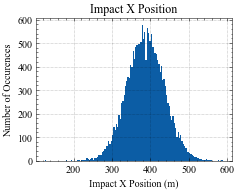

In [131]:
print('Impact X Position - Mean Value: ', np.mean(dispersion_results["impactX"]))
print('Impact X Position - Standard Deviation: ', np.std(dispersion_results["impactX"]))
# dispersion_output_file.write ("impactX: " + str(np.mean(dispersion_results["impactX"])) +' | '+str(np.std(dispersion_results["impactX"])) + "\n")
plt.figure()
plt.hist(dispersion_results["impactX"], bins=int(N**0.5))
plt.title('Impact X Position')
plt.xlabel('Impact X Position (m)')
plt.ylabel('Number of Occurences')


plt.show()

Apogee Time - Mean Value:  14.310798894057365
Apogee Time - Standard Deviation:  0.3546958639105797


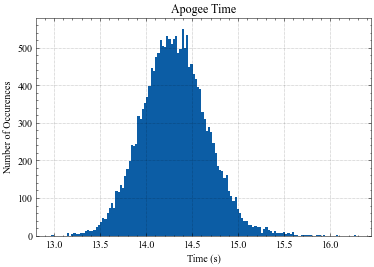

In [61]:
print('Apogee Time - Mean Value: ', np.mean(dispersion_results["apogeeTime"]))
print('Apogee Time - Standard Deviation: ', np.std(dispersion_results["apogeeTime"]))
# dispersion_output_file.write ("apogeeTime: " + str(np.mean(dispersion_results["apogeeTime"])) +' | '+str(np.std(dispersion_results["apogeeTime"])) + "\n")
plt.figure()
plt.hist(dispersion_results["apogeeTime"], bins=int(N**0.5))
plt.title('Apogee Time')
plt.xlabel('Time (s)')
plt.ylabel('Number of Occurences')
plt.show()

Impact Y Position - Mean Value:  -0.21956565235608472
Impact Y Position - Standard Deviation:  38.15197587463702


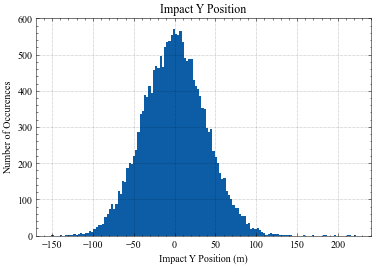

In [62]:
print('Impact Y Position - Mean Value: ', np.mean(dispersion_results["impactY"]))
print('Impact Y Position - Standard Deviation: ', np.std(dispersion_results["impactY"]))
# dispersion_output_file.write ("impactY: " + str(np.mean(dispersion_results["impactY"])) +' | '+str(np.std(dispersion_results["impactY"])) + "\n")
plt.figure()
plt.hist(dispersion_results["impactY"], bins=int(N**0.5))
plt.title('Impact Y Position')
plt.xlabel('Impact Y Position (m)')
plt.ylabel('Number of Occurences')
plt.show()

### Cambridge Disp

In [64]:
index_cb = df_cb['INDEX']
time_cb = df_cb['TIME_SECONDS_DOUBLE']
altitude_cb = df_cb['ALTITUDE_METERS_DOUBLE']
easting_cb = df_cb['EASTINGS_METERS_DOUBLE']
northing_cb = df_cb['NORTHINGS_METERS_DOUBLE']

In [65]:
impactX_cb = []
impactY_cb = []
for i in range(1, len(index_cb), 1):
  if index_cb[i]==0 and index_cb[i-1]!=0:
    impactX_cb.append(easting_cb[i-1])
    impactY_cb.append(northing_cb[i-1])

print(len(impactX_cb), len(impactY_cb))

2999 2999


Impact X Position - Mean Value:  425.96162910970327
Impact X Position - Standard Deviation:  90.76871994134962


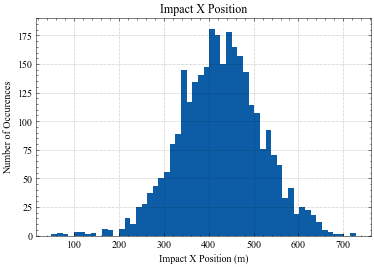

In [66]:
print('Impact X Position - Mean Value: ', np.mean(impactX_cb))
print('Impact X Position - Standard Deviation: ', np.std(impactX_cb))
plt.figure()
plt.hist(impactX_cb, bins=int(2999**0.5))
plt.title('Impact X Position')
plt.xlabel('Impact X Position (m)')
plt.ylabel('Number of Occurences')
plt.show()

Impact X Position - Mean Value:  11.710644948316105
Impact X Position - Standard Deviation:  96.26873638225024


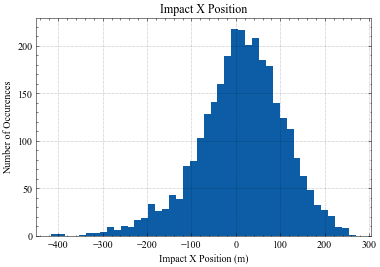

In [67]:
print('Impact X Position - Mean Value: ', np.mean(impactY_cb))
print('Impact X Position - Standard Deviation: ', np.std(impactY_cb))
plt.figure()
plt.hist(impactY_cb, bins=int(1999**0.5))
plt.title('Impact X Position')
plt.xlabel('Impact X Position (m)')
plt.ylabel('Number of Occurences')
plt.show()

### Ellipses

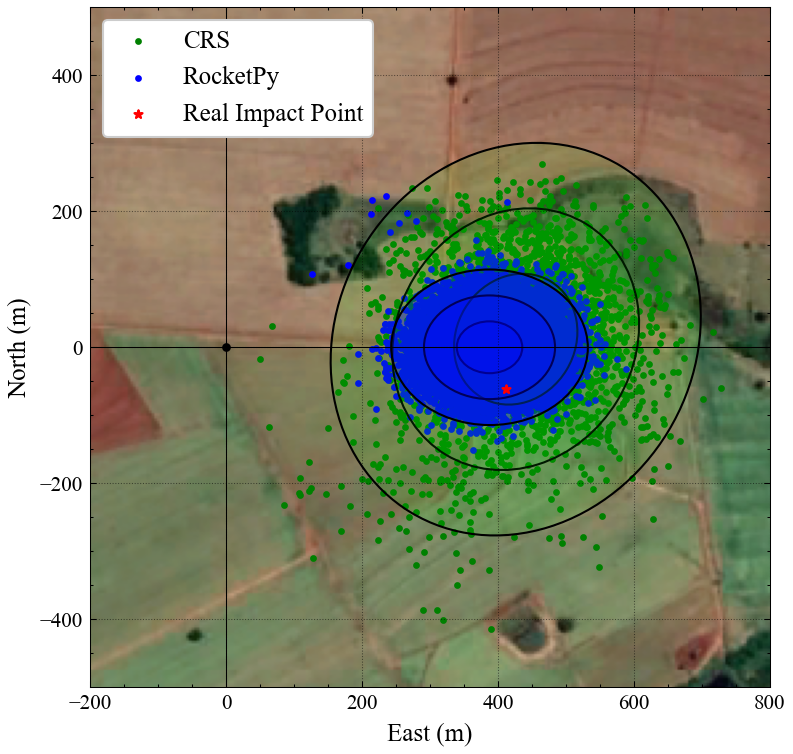

In [187]:
# Import libraries
from imageio import imread
from matplotlib.patches import Ellipse

# Import background map
img = imread("Valetudo_rocketpy_CFD/Valetudo_rocketpy_CFD/Valetudo_basemap_final.png")

# Retrieve dispersion data por apogee and impact XY position
#apogeeX = np.array(dispersion_results['apogeeX'])
#apogeeY = np.array(dispersion_results['apogeeY'])
impactX = np.array(dispersion_results['impactX'])
impactY = np.array(dispersion_results['impactY'])
impactX_cb = np.array(impactX_cb)
impactY_cb = np.array(impactY_cb)

# Define function to calculate eigen values
def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]
  
# Create plot figure
plt.figure(num=None, figsize=(8, 6), dpi=150, facecolor='w', edgecolor='k')
ax = plt.subplot(111)


# Draw cambridge impact points (cambridge)
plt.scatter(impactX_cb, impactY_cb, s=5, label="CRS", color='green')

# Calculate error ellipses for impact (CAMBRIDGE)
apogeeCov = np.cov(impactX_cb, impactY_cb)
apogeeVals, apogeeVecs = eigsorted(apogeeCov)
apogeeTheta = np.degrees(np.arctan2(*apogeeVecs[:,0][::-1]))
apogeeW, apogeeH = 2 * np.sqrt(apogeeVals)

# Draw error ellipses for impact (CAMBRIDGE)
for j in [1, 2, 3]:
    apogeeEll = Ellipse(xy=(np.mean(impactX_cb), np.mean(impactY_cb)),
                  width=apogeeW*j, height=apogeeH*j,
                  angle=apogeeTheta, color='black')
    apogeeEll.set_facecolor((0, 1, 0, 0.1))
    ax.add_artist(apogeeEll)

# Calculate error ellipses for impact (ROCKETPY)
impactCov = np.cov(impactX, impactY)
impactVals, impactVecs = eigsorted(impactCov)
impactTheta = np.degrees(np.arctan2(*impactVecs[:,0][::-1]))
impactW, impactH = 2 * np.sqrt(impactVals)

# Draw error ellipses for impact (ROCKETPY)
impact_ellipses = []
for j in [1, 2, 3]:
    impactEll = Ellipse(xy=(np.mean(impactX), np.mean(impactY)),
                  width=impactW*j, height=impactH*j,
                  angle=impactTheta, color='black')
    impactEll.set_facecolor((0, 0, 1, 0.35))
    impact_ellipses.append(impactEll)
    ax.add_artist(impactEll)



# Add title and labels to plot
#ax.set_title('$1\sigma$, $2\sigma$ and $3\sigma$ ellipses of the Impact Point')
ax.set_ylabel('North (m)', fontsize=12)
ax.set_xlabel('East (m)', fontsize=12)

# Add background image to plot
dx = 0
dy = 0
plt.imshow(img,zorder=0, extent=[-1000-dx, 1000-dx, -1000-dy, 1000-dy])
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)

plt.xlim(-200, 800)
plt.ylim(-500, 500)

# Draw impact points (RocketPy)
plt.scatter(impactX, impactY, s=5, label="RocketPy", color='blue')

# Draw launch point
plt.scatter(0, 0, s=10, color='black')

# Add real landing point
plt.scatter( 411.89, -61.07, s=17, color='red', marker='*', label="Real Impact Point", zorder=1000)

# Calculate probability of rocket being out of 3-sigma error ellipse for impact
#cos_angle = np.cos(np.radians(180.-impactTheta))
#sin_angle = np.sin(np.radians(180.-impactTheta))
#
#xc = impactX - np.mean(impactX)
#yc = impactY - np.mean(impactY)
#
#xct = xc * cos_angle - yc * sin_angle
#yct = xc * sin_angle + yc * cos_angle 
#
#n=3
#rad_cc = (xct**2/(n*impactW/2.)**2) + (yct**2/(n*impactH/2.)**2)
#
#colors_array = []
#count = 0
#
#for r in rad_cc:
#    if r <= 1.:
#        # point in ellipse
#        colors_array.append('red')
#        count+=1
#    else:
#        # point not in ellipse
#        colors_array.append('blue')
#        
#print("Probability of Impact out of Error Ellipses: " + "{:.3f}".format(100 - 100*count/len(impactX)) + " %")
plt.legend(fontsize=12, loc=2)#facecolor='white')
#plt.grid()
plt.savefig('Graficos finais v2/Final_Ellipses.pdf')
plt.show()